In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

**![imagen_2024-01-16_184503279.png](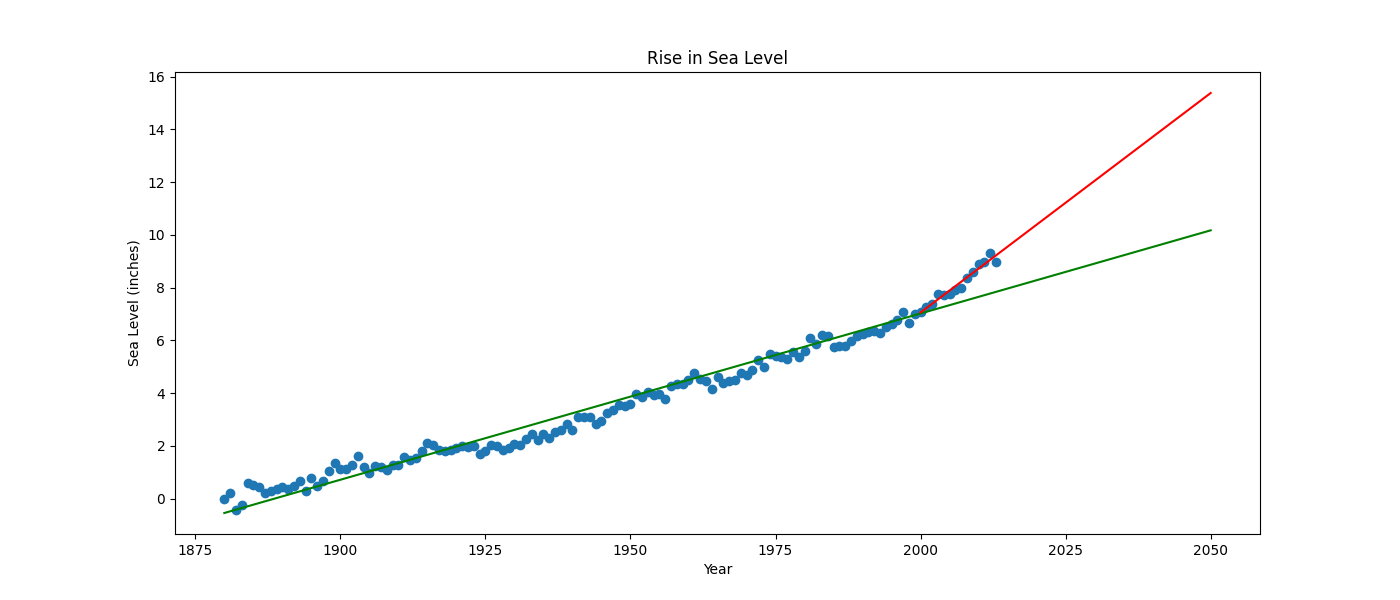![imagen_2024-01-16_184509484.png](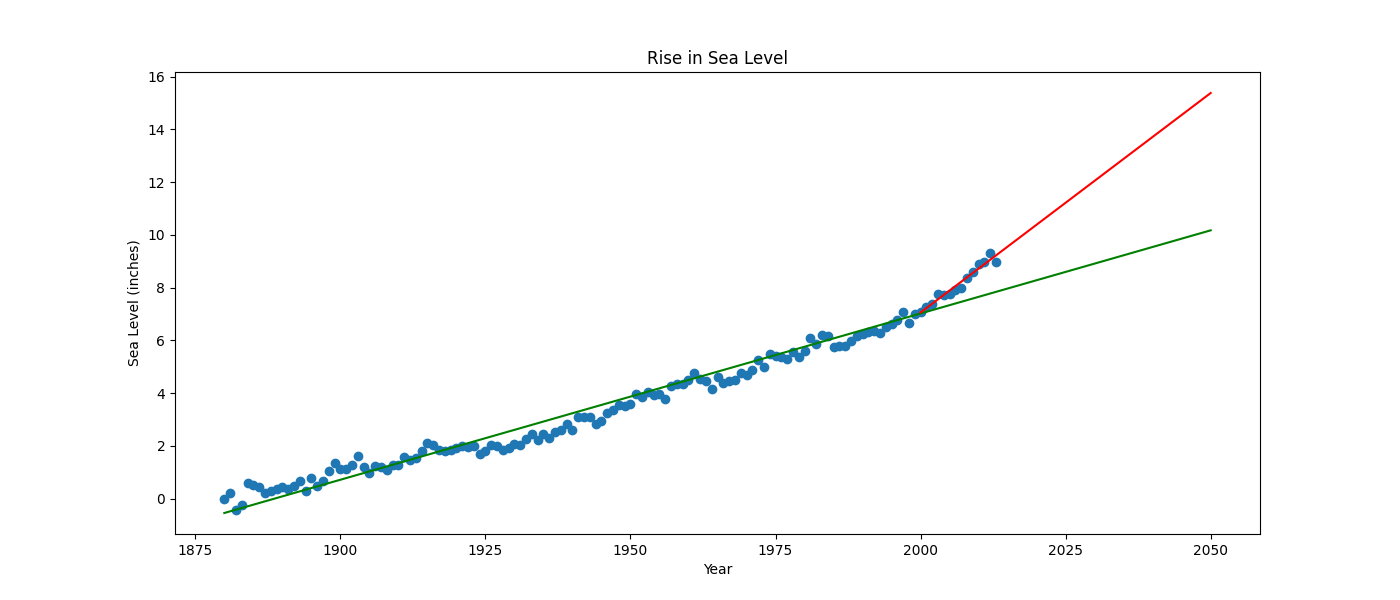![imagen_2024-01-16_184516194.png](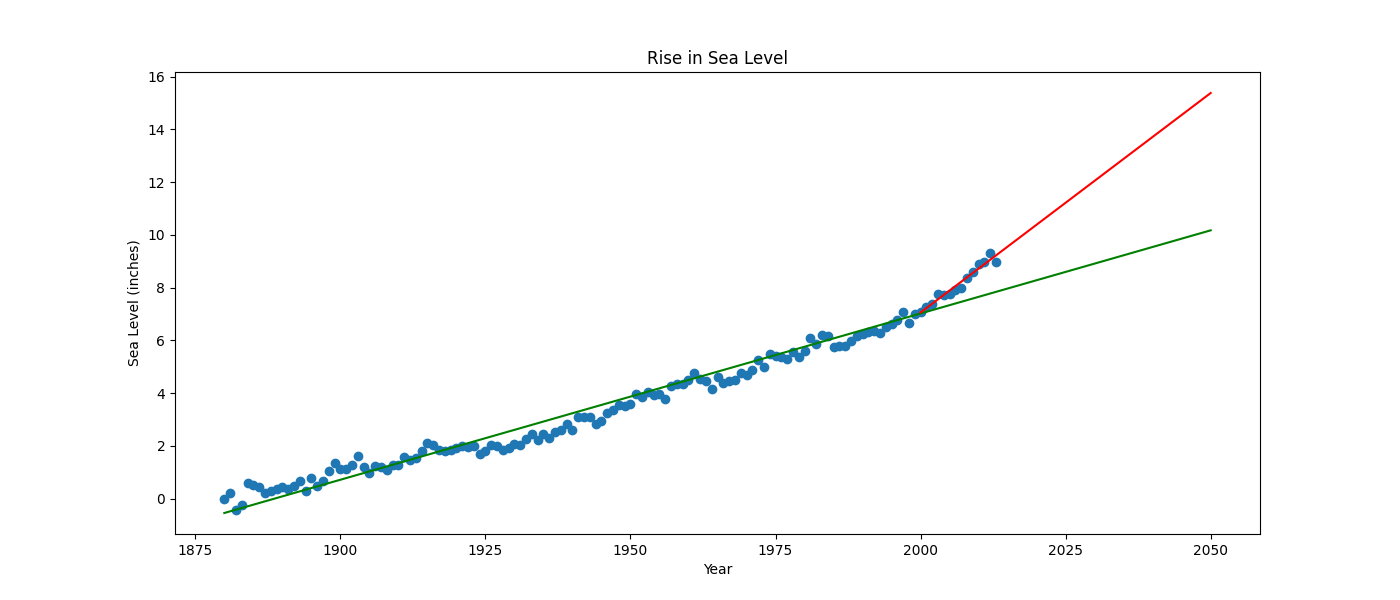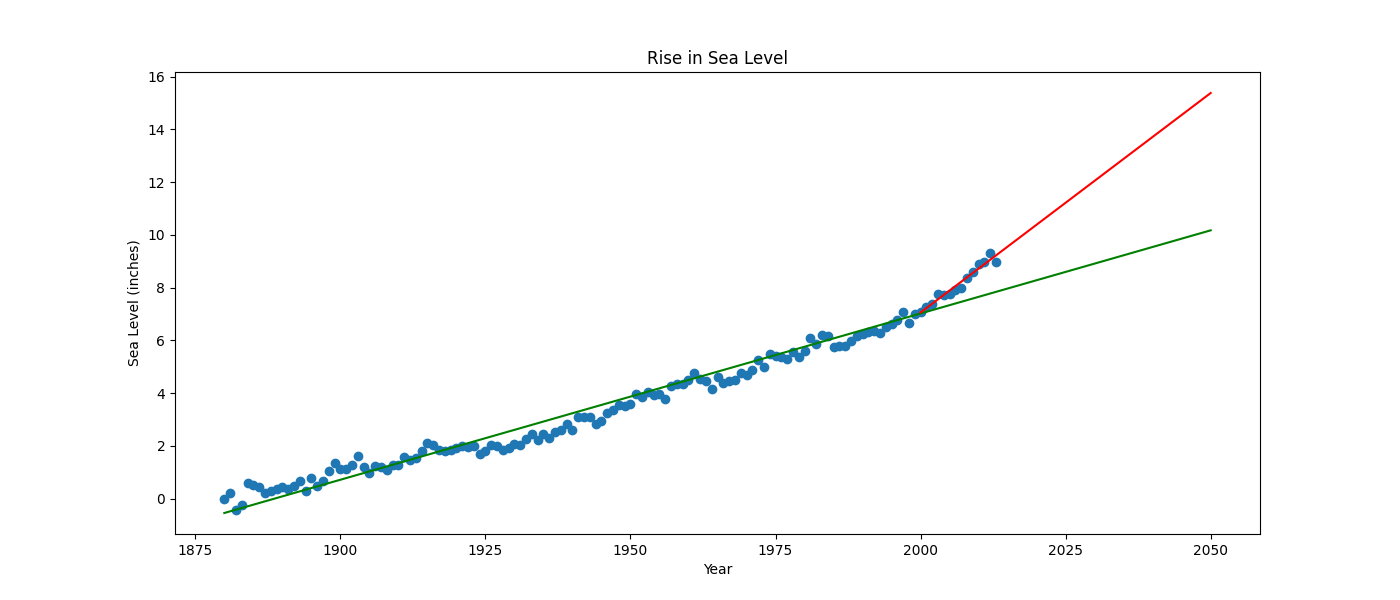)))Read data from file**

In [37]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


**Create scatter plot**

Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

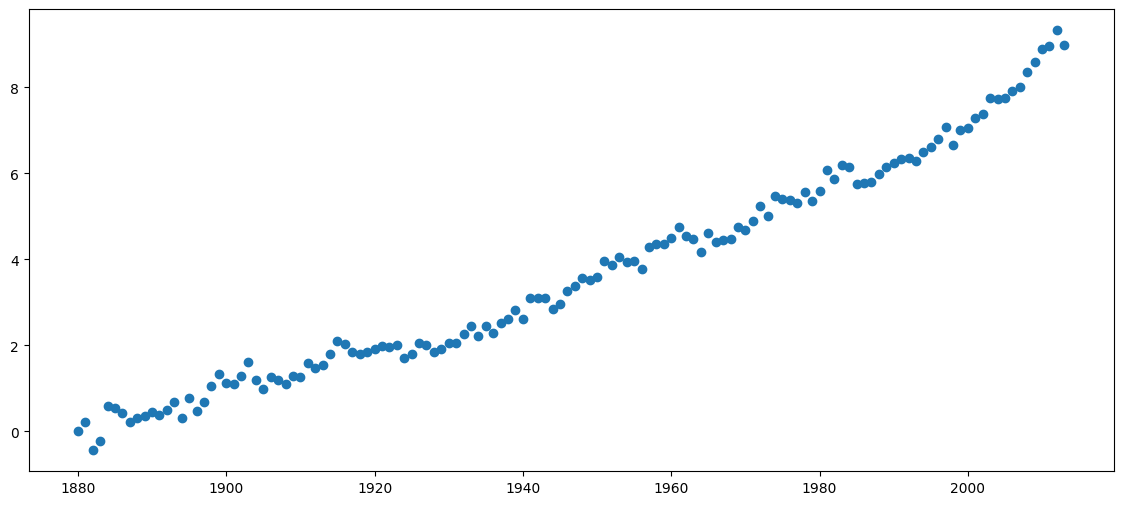

In [38]:
x=df['Year']
y=df['CSIRO Adjusted Sea Level']

fig , ax = plt.subplots(figsize=(14,6))
plt.scatter(x,y)

**Create first line of best fit**

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
166    2046
167    2047
168    2048
169    2049
170    2050
Length: 171, dtype: int64 0     -12.910193
1     -12.743766
2     -12.577338
3     -12.410911
4     -12.244484
         ...    
166    14.716734
167    14.883162
168    15.049589
169    15.216016
170    15.382444
Length: 171, dtype: float64


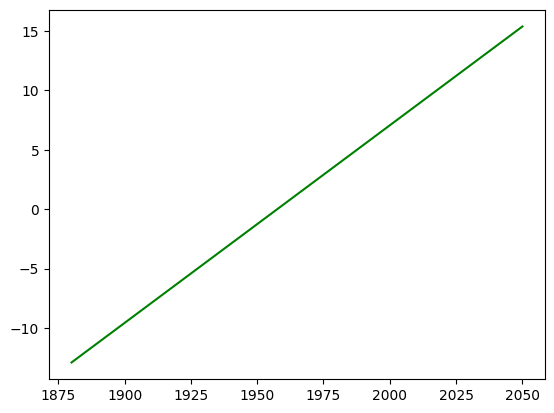

In [43]:
res = linregress(x,y)
x_first= pd.Series([i for i in range(1880,2051)])
y_first= res.slope*x_first + res.intercept
plt.plot(x_first,y_first , 'g')

**Create second line of best fit**

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

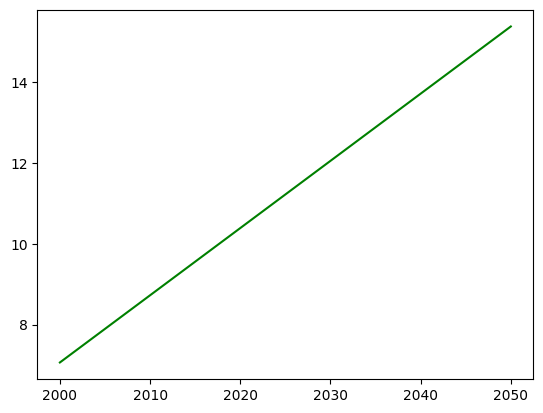

In [45]:
x=df.loc[df['Year']>=2000]['Year']
y=df.loc[df['Year']>=2000]['CSIRO Adjusted Sea Level']

res_second = linregress(x,y)
x_second= pd.Series([i for i in range(2000,2051)])
y_second= res_second.slope*x_second + res_second.intercept
plt.plot(x_second,y_second , 'g')

**Add labels and title**

The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

In [52]:
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')

Text(0.5, 1.0, 'Rise in Sea Level')

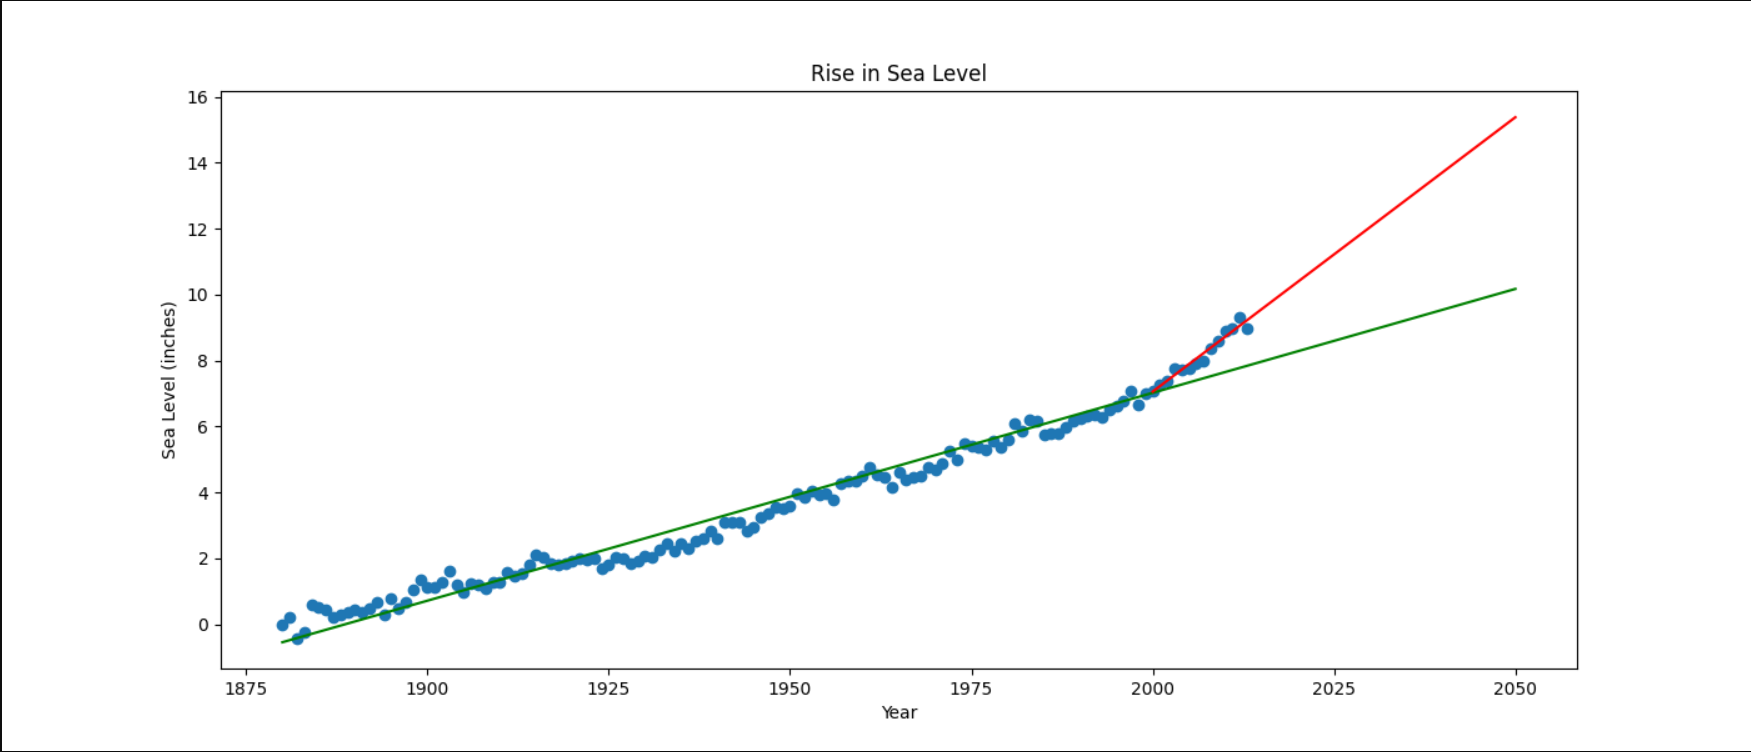